<div class="alert alert-block alert-success">

### Seaborn Highlights


- Intregrated with pandas
- High level interface to plot data
- Additional functionality, better defaults
- Less code than matplotlib 
- All of the functionality is accessible at the top level.

---
<div class="alert alert-block alert-info">
    
### Import statements

In [5]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
from pydataset import data

Seaborn API Reference  
https://seaborn.pydata.org/api.html#

### Different type of plots in Seaborn

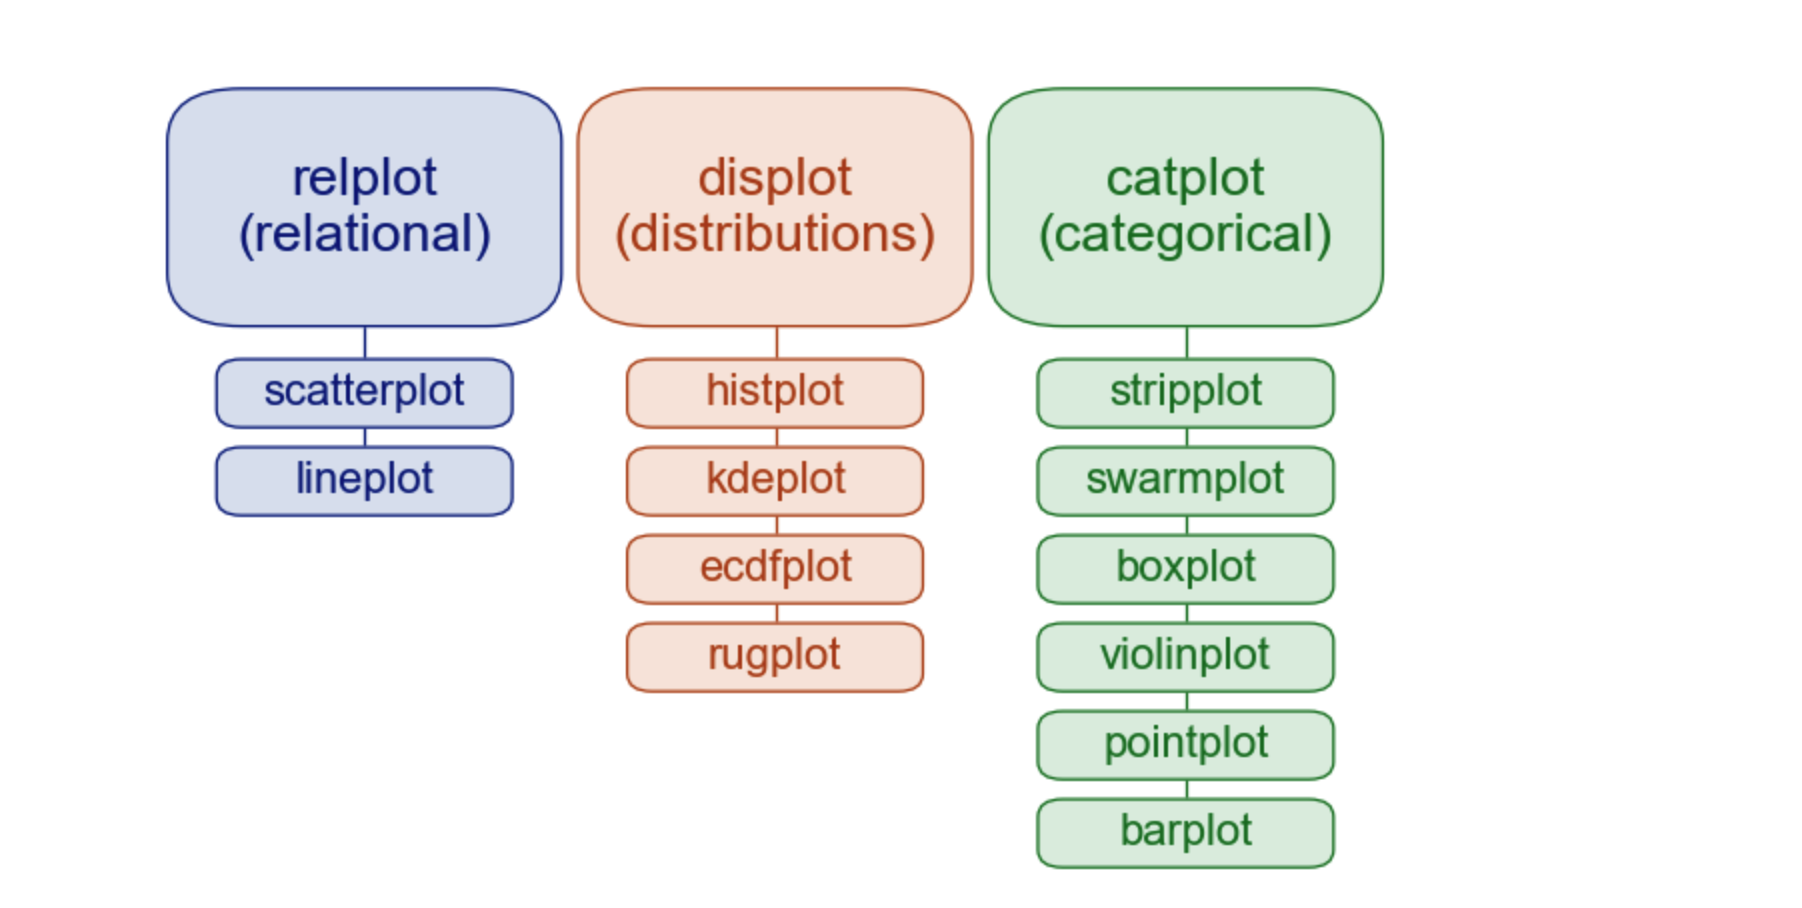

 - source: https://seaborn.pydata.org/tutorial/function_overview.html

In [4]:
# Option 1 : Load directly from sns dataset using load_dataset
mpg = sns.load_dataset('mpg')
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [6]:
# look for all datasets available in seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

---
<div class="alert alert-block alert-info">
    
### **Relational Plots**

In [7]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


Let's make a scatter plot the way we learned before, with matplotlib:

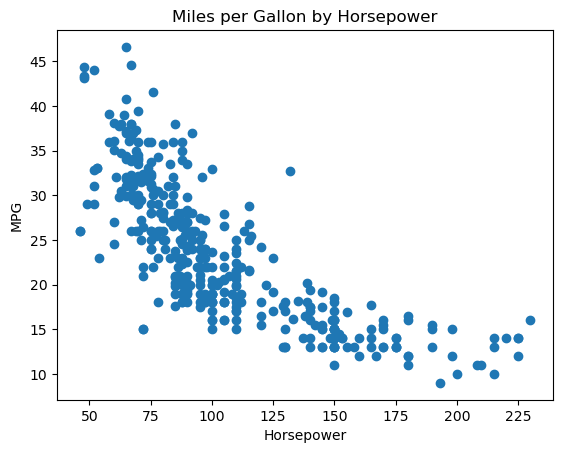

In [9]:
# scatterplot in matplotlib
plt.scatter(mpg.horsepower,mpg.mpg)
plt.title('Miles per Gallon by Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

Now let's use one using seaborn's relplot

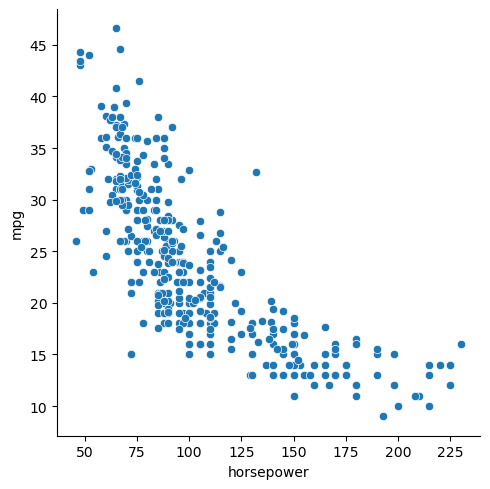

In [11]:
# Explore relationship between total_bill and tip using relplot
# instead of two series,
# Specify your data
# specify the strings that represent your x and y
sns.relplot(data=mpg, x='horsepower',y='mpg')
plt.show() # or use semi-colon ;

---
<div class="alert alert-block alert-info">
    
### Extra dimension: Hue

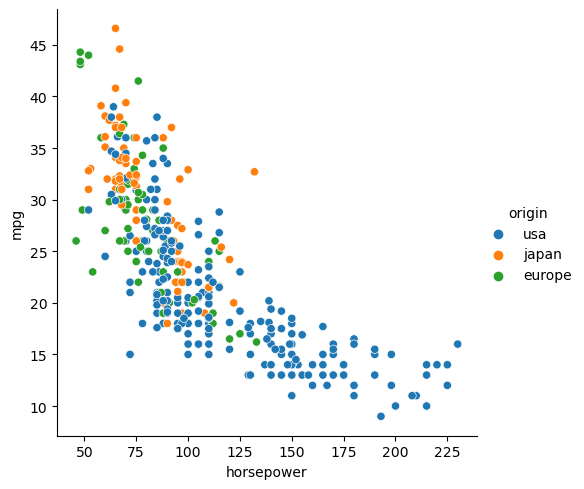

In [12]:
# visualize if relationship is different for smokers" 
# vs non-smoker (use hue argument)

sns.relplot(data=mpg, x='horsepower',y='mpg', hue='origin')
plt.show()

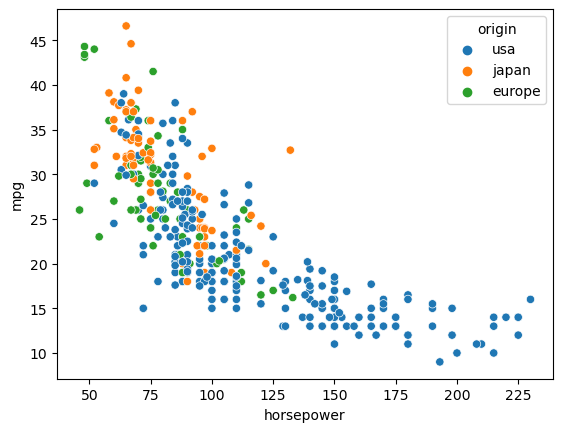

In [13]:
sns.scatterplot(data=mpg, x='horsepower',y='mpg', hue='origin')
plt.show()

In [15]:
# model year by decade

mpg['decade'] = mpg.model_year.apply(lambda x: str(x)[0]+'0\'s')



In [16]:
mpg.decade.value_counts()

70's    309
80's     89
Name: decade, dtype: int64

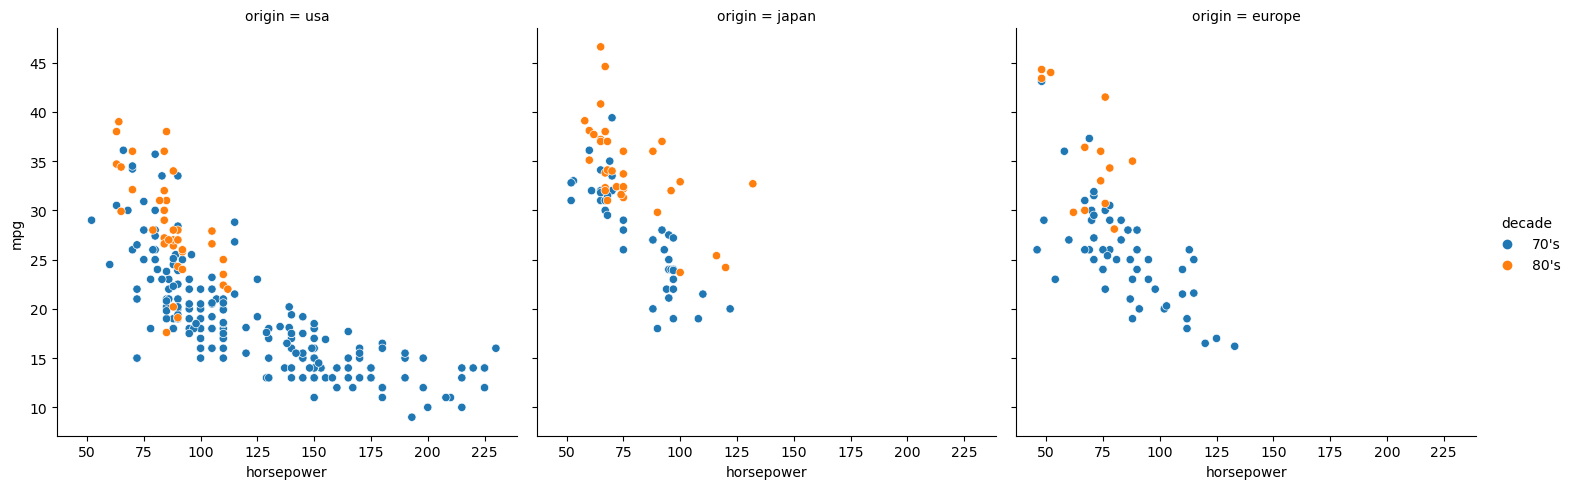

In [19]:
sns.relplot(
            data=mpg,
            x='horsepower',
            y='mpg',
            hue='decade',
            col='origin');

---
<div class="alert alert-block alert-info">
    
### Extra Dimension: **Style**

In [ ]:
# observational note: why is lunchtime tip lumped in groups?
# we are likely going to investigate this further to see if
# there is any extra information to compound here.


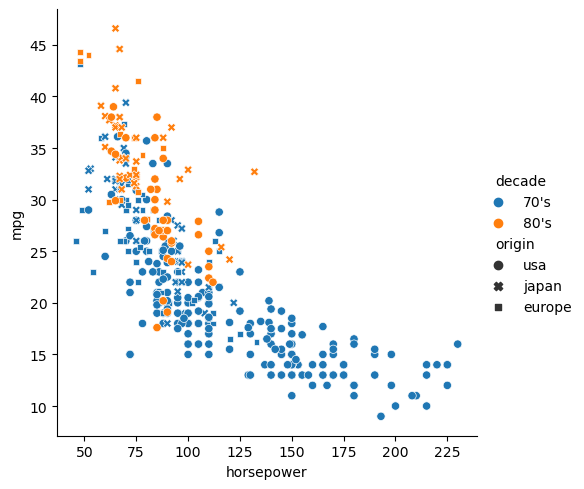

In [20]:
sns.relplot(
            data=mpg,
            x='horsepower',
            y='mpg',
            hue='decade',
            style='origin');

In [ ]:
# Style argument: extra dimension


In [ ]:
# scatterplot - returns an axes level object


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

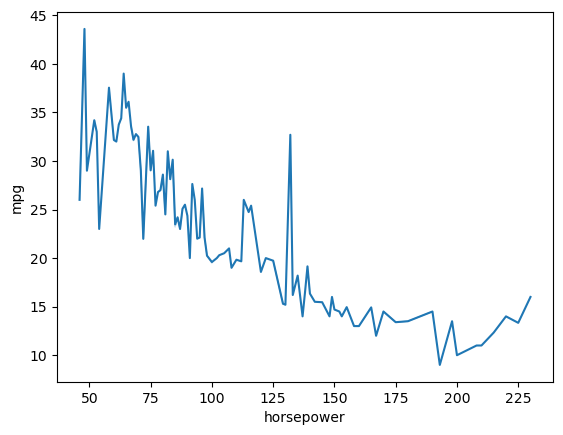

In [29]:
# lineplot - may not be appropriate in this case. Note use of 'kind' argument
sns.lineplot(
data=mpg,
x='horsepower',
y='mpg',
ci=False)
# confidence interbvals

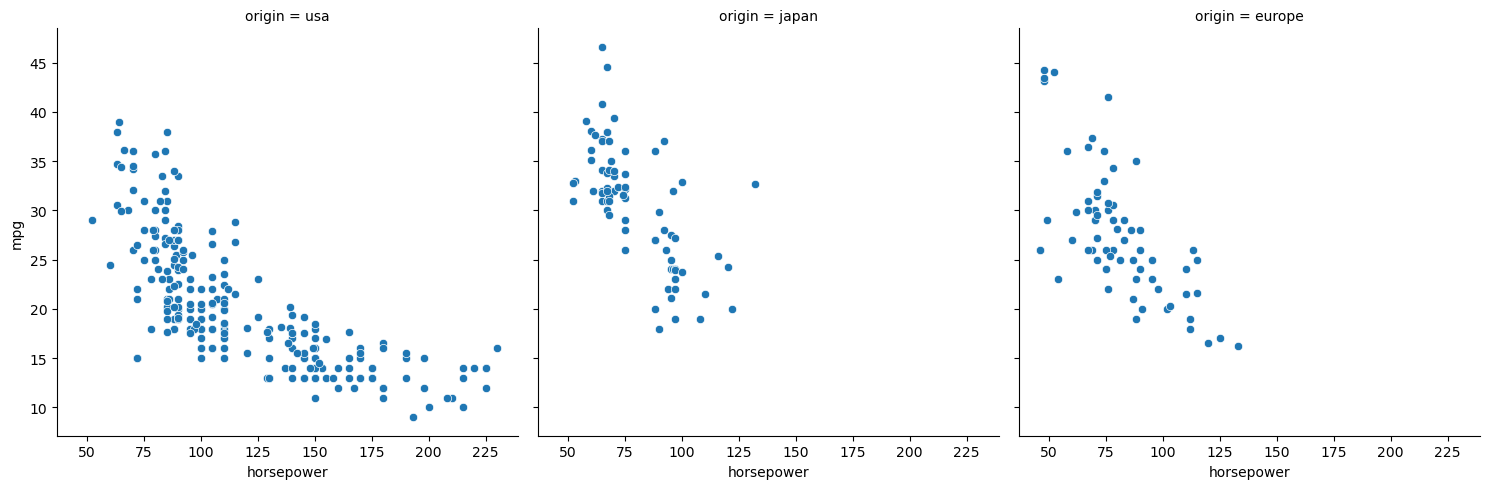

In [28]:
sns.relplot(
data=mpg,
x='horsepower',
y='mpg',
col='origin')

https://en.wikipedia.org/wiki/Bootstrapping_(statistics)

### Small multiple (https://en.wikipedia.org/wiki/Small_multiple)
- similar graphs or charts using the same scale and axes
- easy to compare


- Main idea: Pick a categorical features and create a chart for each category

In [ ]:
# Facetgrid with lineplot


#### Key takeaways?
- Tip amount generally increases with total_bill
- Waiter works in evenings on Sun and sat
- Waiter works during lunchtime on Thursday


#### Ways to add DF columns to the chart (add new dimensions to the chart)

- hue
- col - creates subplots
- style


---
<div class="alert alert-block alert-info">
    
### **Distribution Plots**

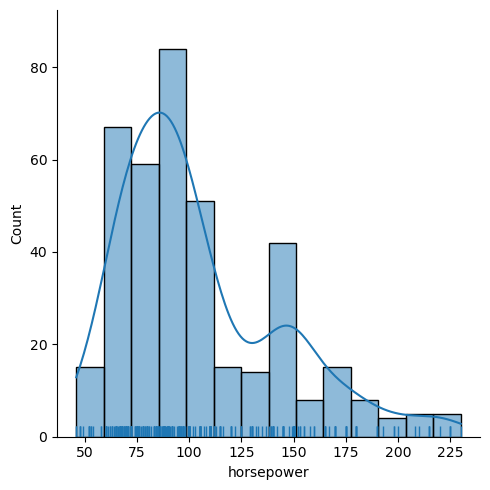

In [31]:
sns.displot(
data=mpg,
x='horsepower',
kde=True,
rug=True)

In [ ]:
# kde = probability of finding a observartions at particular 
# value of x.
# Smooth out version of histogram. 
# Estimating probabilty density function (PDF) 
# in a non-parametric way.


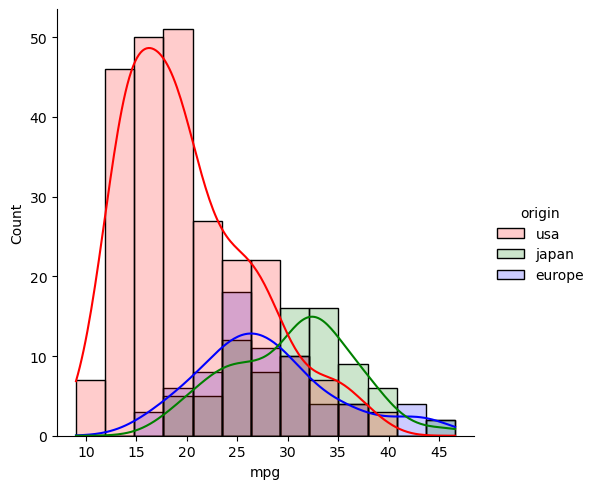

In [40]:
# histogram with hue and stacking
sns.displot(
data=mpg,
x='mpg',
hue='origin',
kde=True,
palette=['r','g','b'],

alpha=0.2)# multiple= 'stack' is bad juju

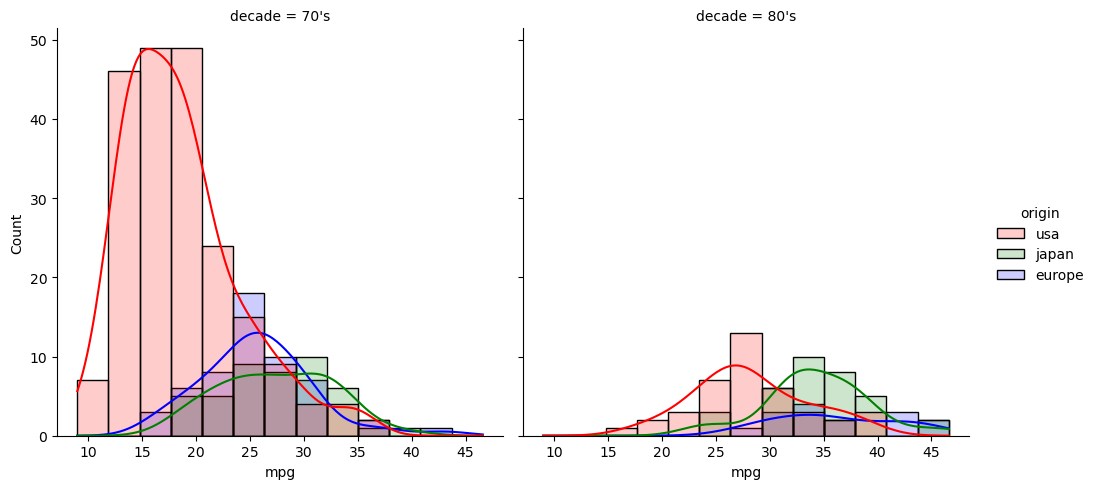

In [41]:
# use 'col' argument to create 'small multiples'
sns.displot(
data=mpg,
x='mpg',
hue='origin',
kde=True,
palette=['r','g','b'],
col='decade',
alpha=0.2)


<AxesSubplot:xlabel='horsepower', ylabel='Count'>

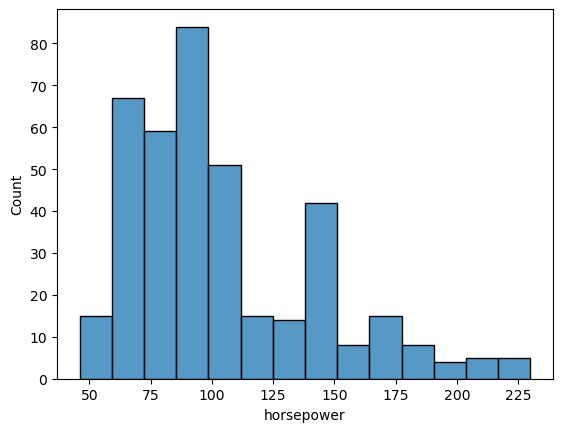

In [42]:
#histplot will return an axes level object
sns.histplot(data=mpg,x='horsepower')

---
<div class="alert alert-block alert-info">
    
### **Categorical Plots**

#### Boxplots

In [ ]:
#  FacetGrid with 'col'

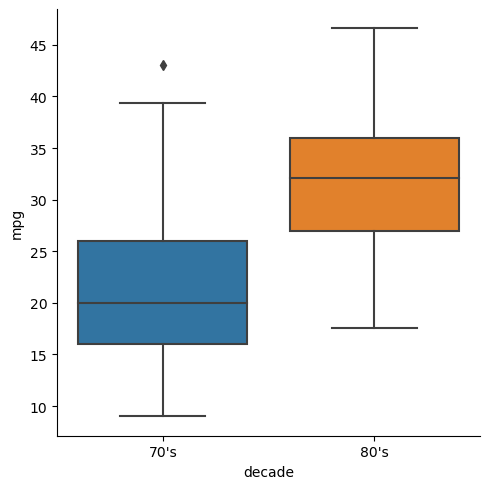

In [43]:
sns.catplot(
data=mpg,
x='decade',
y='mpg',
kind='box')

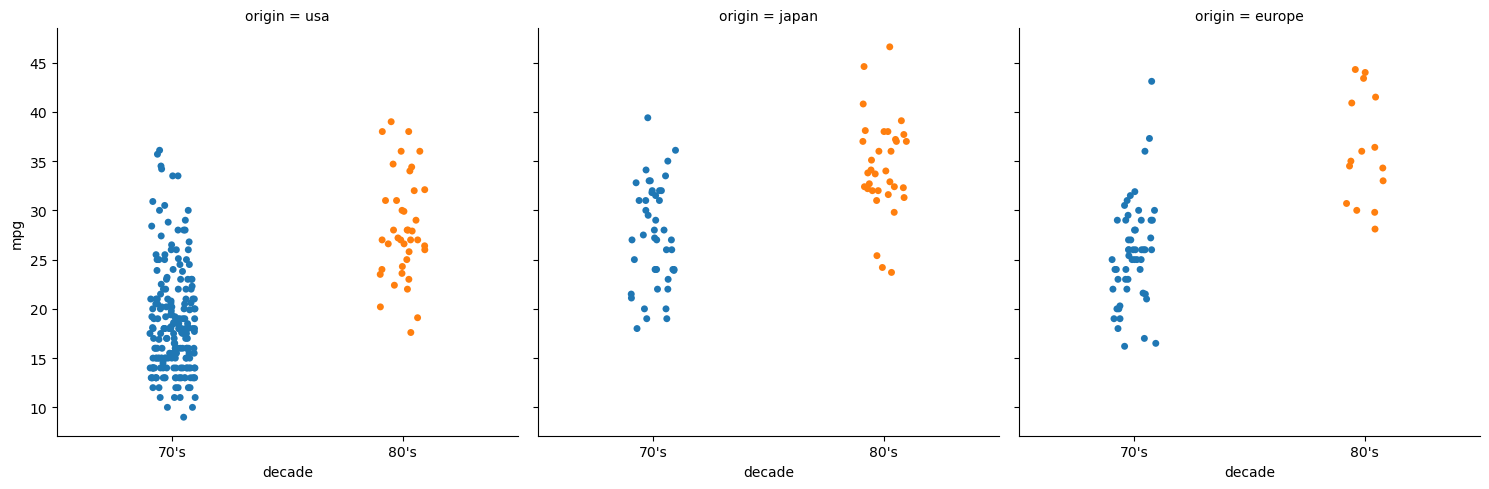

In [45]:
sns.catplot(
data=mpg,
x='decade',
y='mpg',
col='origin')

<AxesSubplot:xlabel='decade', ylabel='mpg'>

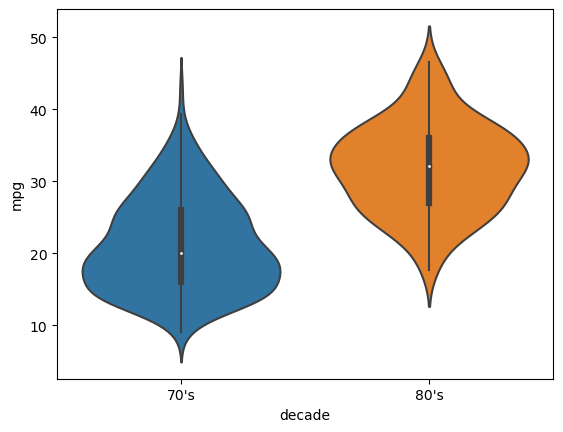

In [47]:
sns.violinplot(
data=mpg,
x='decade',
y='mpg')

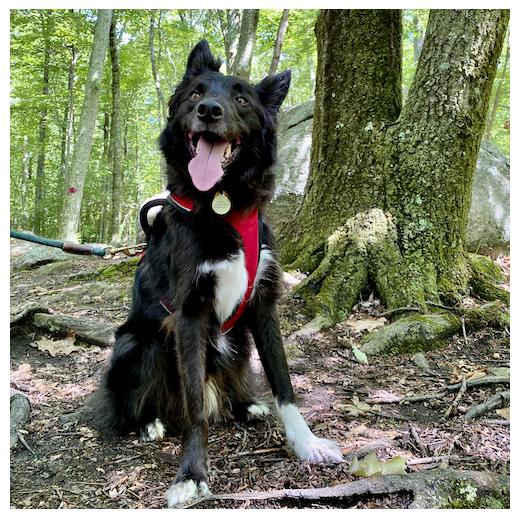

In [49]:
sns.dogplot()

<AxesSubplot:xlabel='decade', ylabel='mpg'>

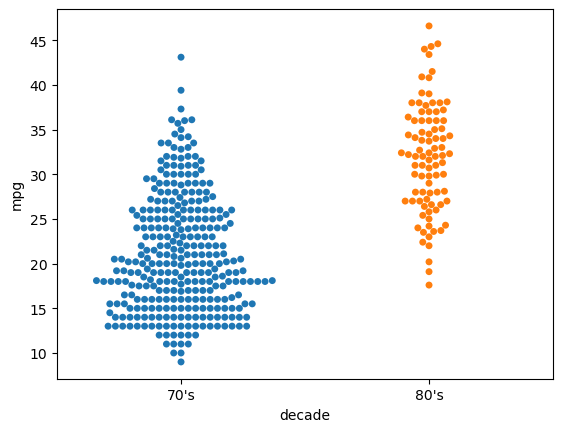

In [48]:
sns.swarmplot(
data=mpg,
x='decade',
y='mpg')

---
<div class="alert alert-block alert-info">
    
### **Subplots**

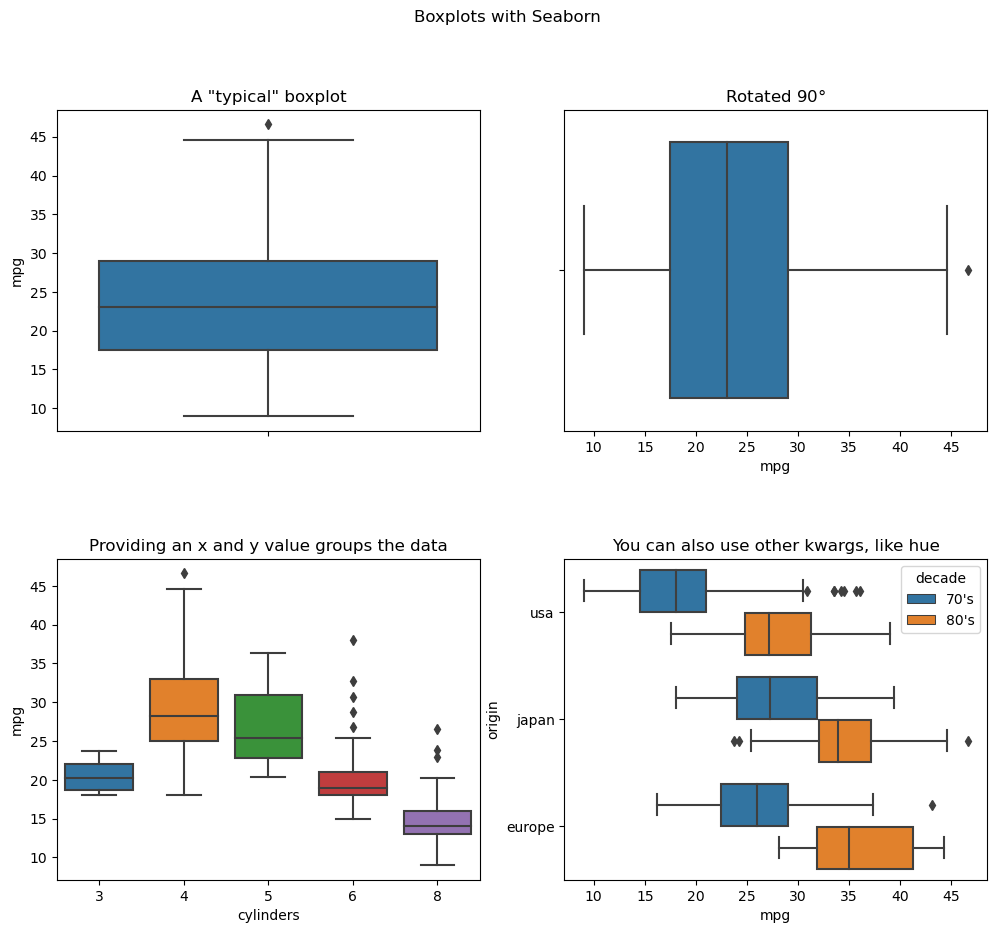

In [51]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

plt.subplot(221)
sns.boxplot(data=mpg, y='mpg')
plt.title('A "typical" boxplot')

plt.subplot(222)
sns.boxplot(data=mpg, x='mpg')
plt.title('Rotated 90$\degree$')

plt.subplot(223)
sns.boxplot(data=mpg, y='mpg', x='cylinders')
plt.title('Providing an x and y value groups the data')

plt.subplot(224)
sns.boxplot(data=mpg, y='origin', x='mpg', hue='decade')
plt.title('You can also use other kwargs, like hue')

plt.subplots_adjust(hspace=0.4)

#### Pairplot

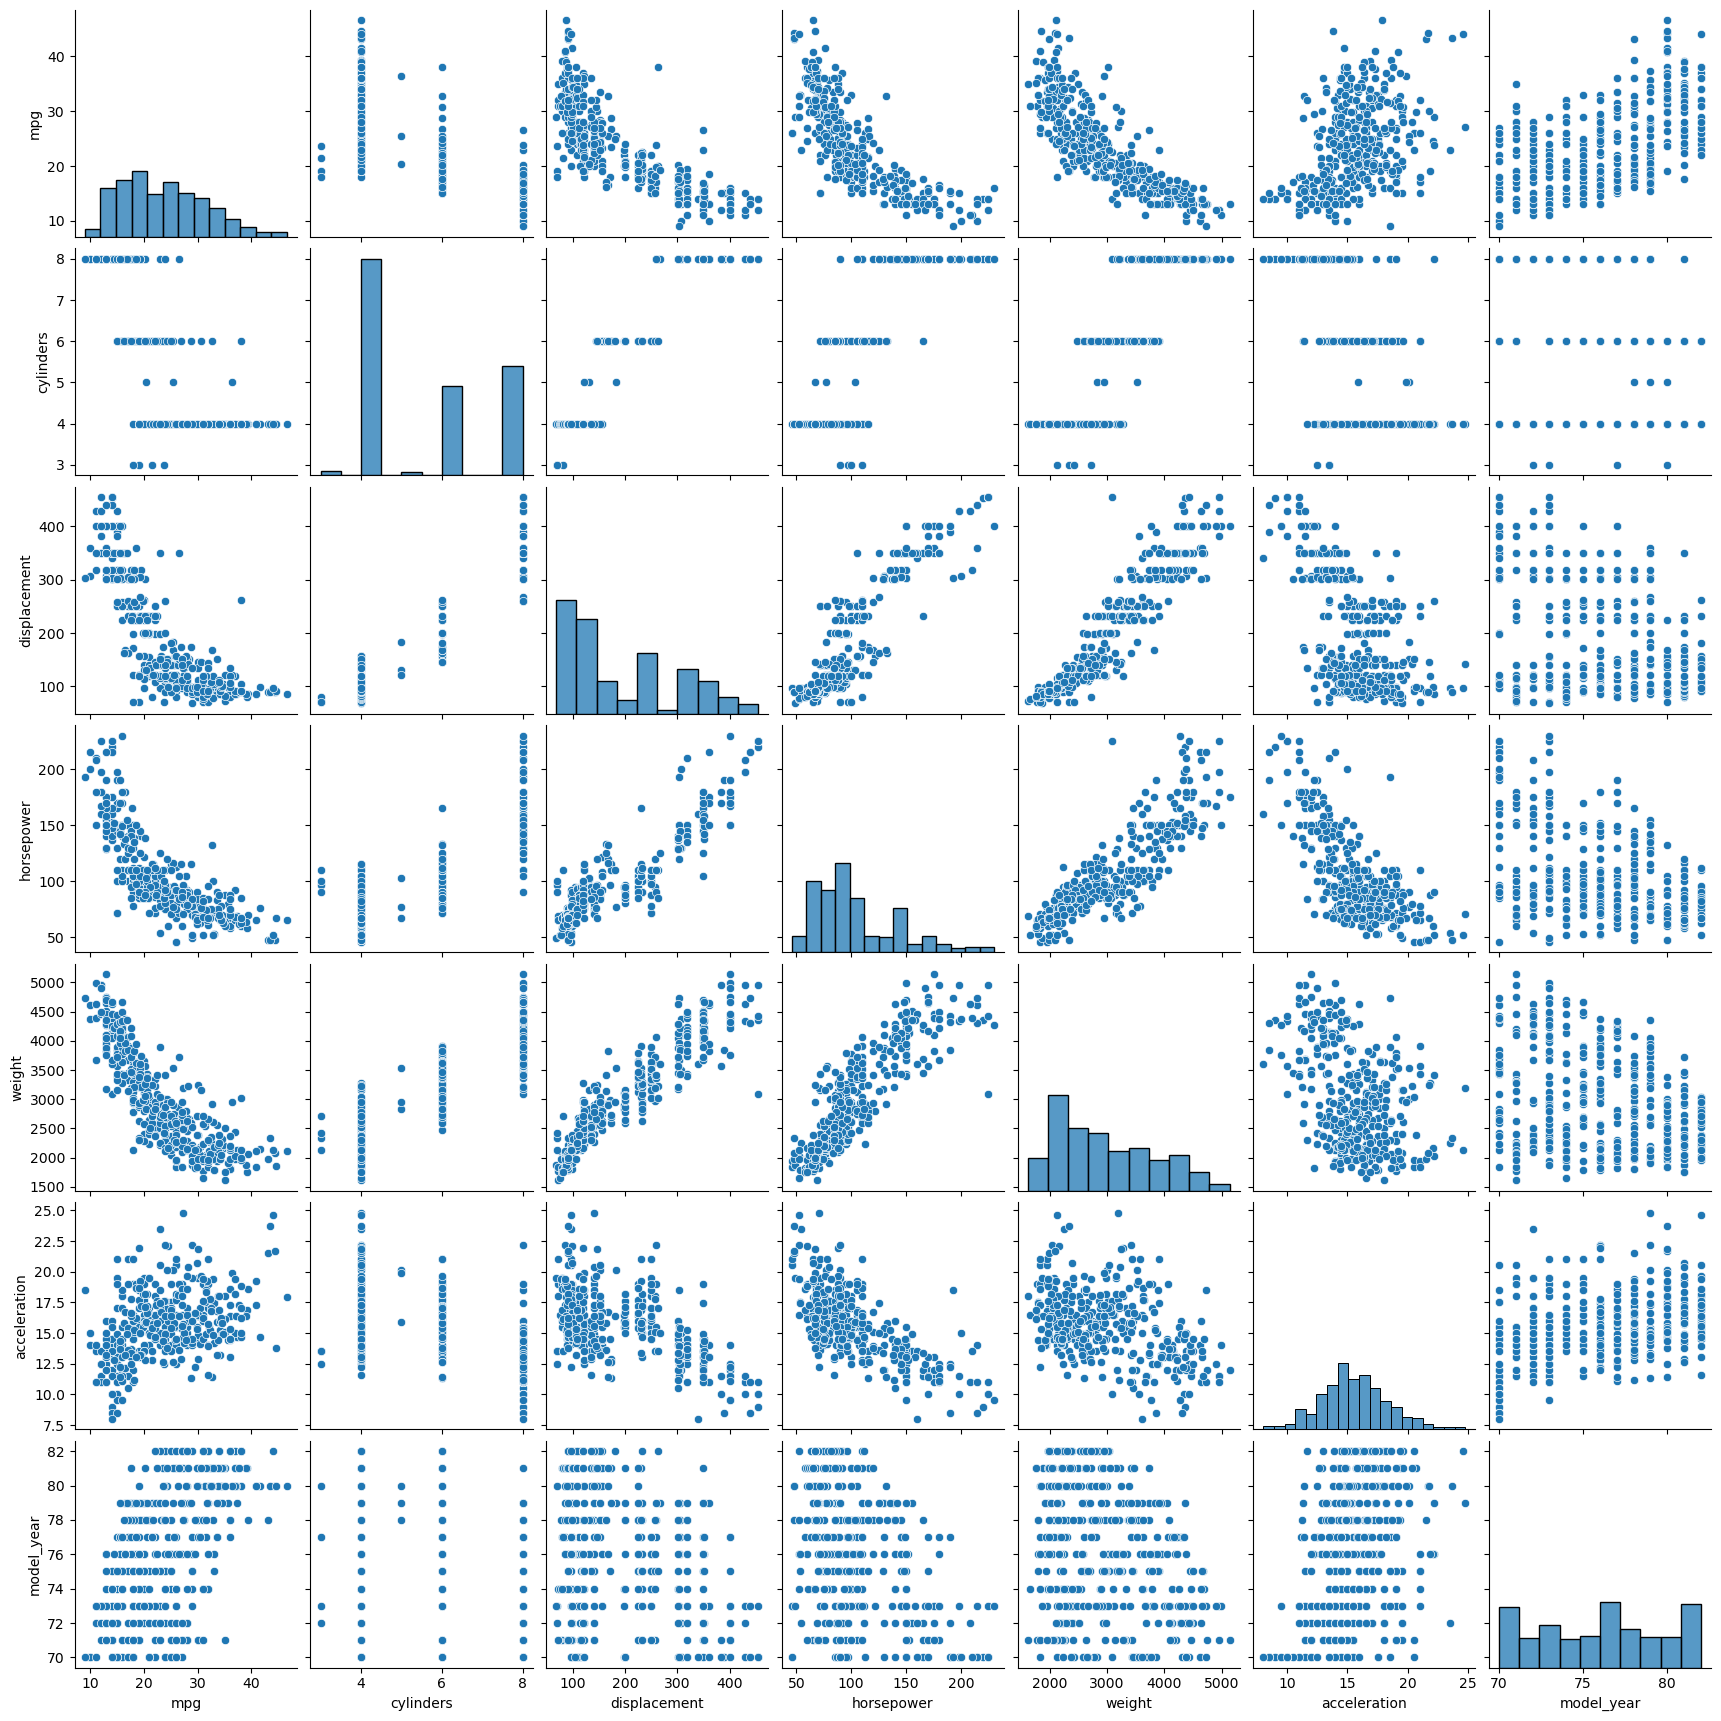

In [52]:
# pair plt is great birds-eye view:
sns.pairplot(mpg)
# corner=True shows only one set of plots


#### Jointplot

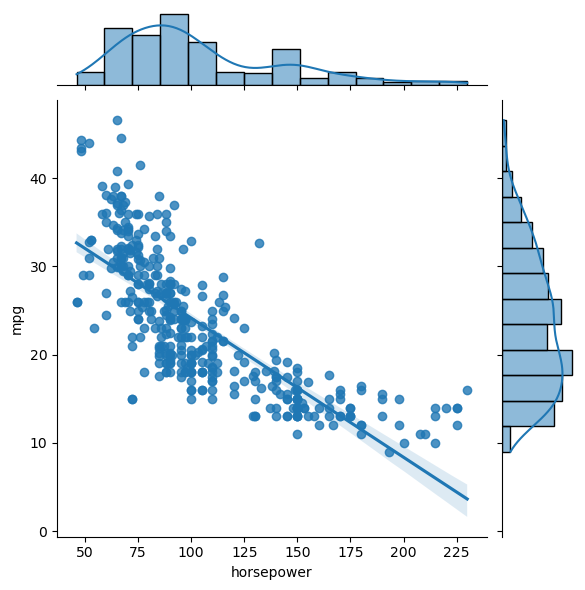

In [53]:
sns.jointplot(
data=mpg,
x='horsepower',
y='mpg',
kind='reg')

#### Heatmap

In [55]:
mpg.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<AxesSubplot:>

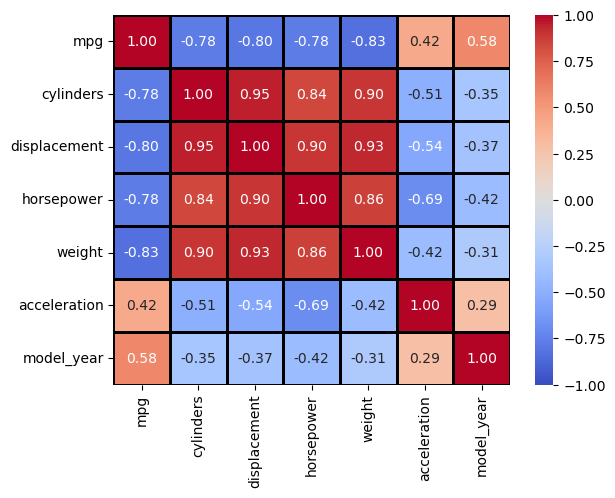

In [56]:
sns.heatmap(mpg.corr(),
           annot=True,
           cmap='coolwarm',
           vmax=1,
           vmin=-1,
           center=0,
           linewidth=1,
           linecolor='k',
           fmt='.2f')

Seaborn color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html  
Check out this great post too: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f